# DATASET DE YELP

Importamos librerías

In [19]:
import pandas as pd
import numpy as np
import json # Para trabajar con JSON
from pandas import json_normalize
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
#import nltk
#from wordcloud import WordCloud
#from textblob import TextBlob
#from nltk.corpus import stopwords
#from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Descargar los stopwords en español e inglés
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

# Configurar estilo de visualización
sns.set(style="whitegrid", palette="muted")
#plt.rcParams["figure.figsize"] = (12, 6)

import warnings
warnings.filterwarnings("ignore")

## 1. Extraccción, Tranformación y Carga de Datos (ETL)

In [20]:
data_business = pd.read_pickle('D:/2024/HenryData/PF/Datos_Crudos/yelp/business.pkl')

In [21]:
data_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data_business.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [23]:
df_business = data_business.iloc[:, :14]

In [24]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [25]:
# Verificar valores nulos
nulos_df = df_business.isnull().sum()
print("Valores faltantes por columna:")
print(nulos_df[nulos_df > 0])


Valores faltantes por columna:
state             3
attributes    13744
categories      103
hours         23223
dtype: int64


In [26]:
# Completar los datos faltantes en la columna 'state'

id_to_state = {
    "Pns2l4eNsfO8kk83dixA6A": "CA",  # Santa Barbara
    "mpf3x-BjTdTEA3yCZrAYPw": "MO",  # Affton
    "tUFrWirKiKi_TAnsVWINQQ": "AZ"   # Tucson
}

# Actualizar la columna 'state' con base en el business_id
df_business["state"] = df_business.apply(
    lambda row: id_to_state[row["business_id"]] if pd.isnull(row["state"]) and row["business_id"] in id_to_state else row["state"],
    axis=1
)

In [27]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


## 2. Análisis de Datos Exproratorio (EDA)

Distribucón de Ratings

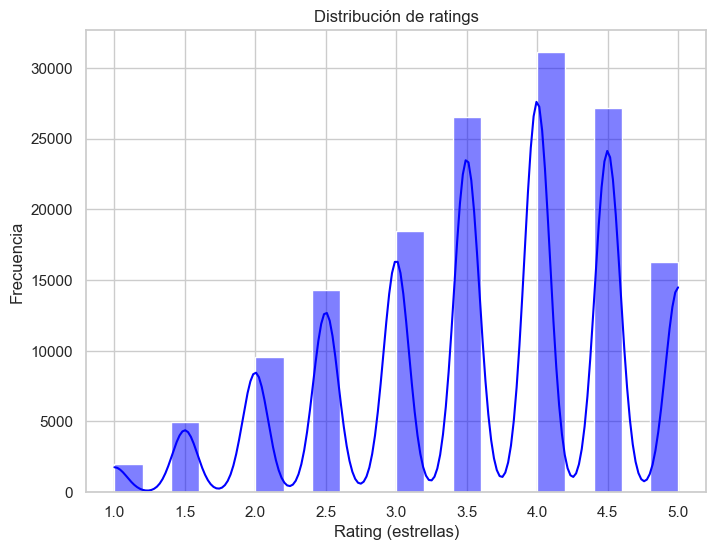

In [28]:
# Distribución de las estrellas (ratings)
plt.figure(figsize=(8, 6))
sns.histplot(df_business["stars"], kde=True, bins=20, color="blue")
plt.title("Distribución de ratings")
plt.xlabel("Rating (estrellas)")
plt.ylabel("Frecuencia")
plt.show()

Insight: Este análisis ayuda a entender si los negocios tienen predominantemente buenos o malos ratings.
Interpretación:
- En general, se oberva una concentración mayor en los ratings con puntuaciones más altas, es decir 4 y 5 estrellas, lo que nos indica que la mayoría de negocios en EE. UU. reciben evaluaciones positivas por parte de los clientes.
- La distribución presenta dos picos principales, uno alrededor de 3.5 estrellas y otro alrededor de 4.5 estrellas. Esto indica que existen dos grupos principales de negocios: aquellos que reciben ratings muy buenos (4.5-5 estrellas) y aquellos que reciben ratings moderadamente buenos (3.5-4 estrellas).
- La alta concentración de ratings positivos sugiere que los negocios en Estados Unidos compiten por ofrecer un buen servicio y productos de calidad para obtener buenas evaluaciones, sin embargo, los resultados pueden variar dependiendo de la categoria del negocio.

Análisis de Categorías Populares

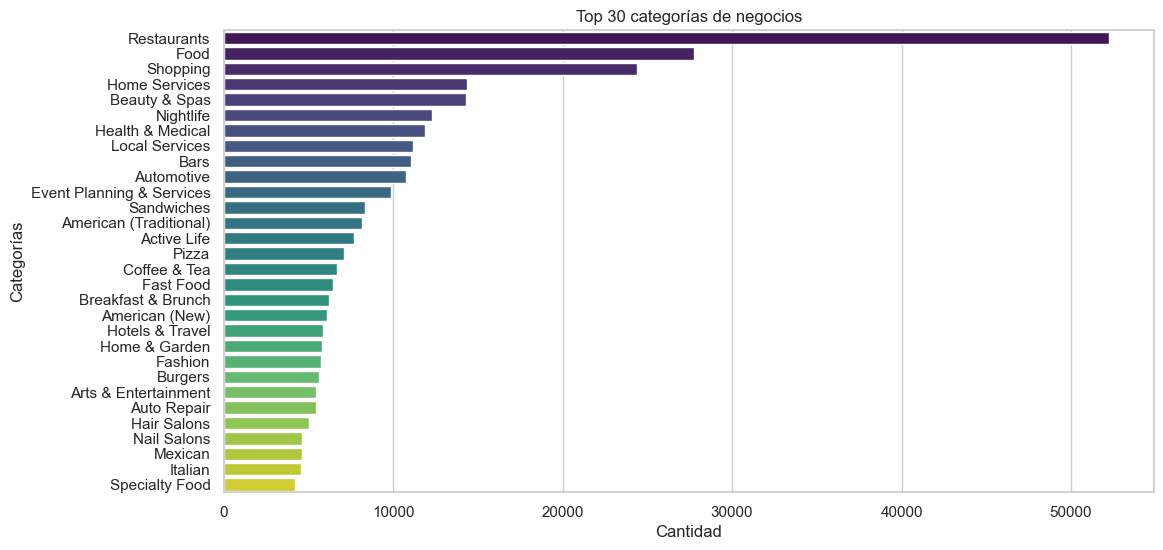

In [29]:
# Contar las categorías más comunes
df_business["categories"] = df_business["categories"].fillna("").apply(lambda x: x.split(", "))
categories = df_business["categories"].explode().value_counts().head(30)

# Visualizar las categorías más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=categories.values, y=categories.index, palette="viridis")
plt.title("Top 30 categorías de negocios")
plt.xlabel("Cantidad")
plt.ylabel("Categorías")
plt.show()

Insight: Identificar las categorías más populares permite focalizar análisis en sectores clave.

Interpretación:
- La categoria que predomida es la relacionada a alimentación, restaurantes y comida ocupan los dos primeros lugares, otras categorias relacionadas a laimentación estan los sandwiches, pizza, comidad rápida, etc. 
-  Otras categorías importantes son servicios para el hogar, belleza y spas, así como servicios locales en general. Esto indica una fuerte demanda de servicios a nivel local y una gran variedad de opciones para los consumidores.

Negocios Abiertos vs Cerrados

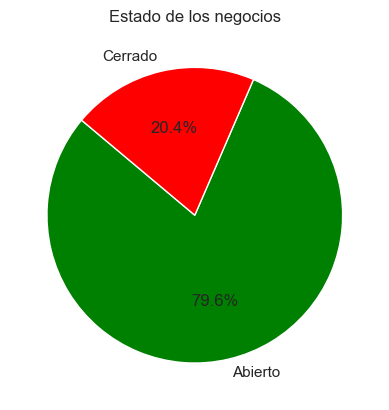

In [30]:
# Proporción de negocios abiertos y cerrados
status_counts = df_business["is_open"].value_counts()
labels = ["Abierto", "Cerrado"]

# Visualizar en un gráfico de pastel
plt.pie(status_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=["green", "red"])
plt.title("Estado de los negocios")
plt.show()

Insight: Este análisis da una perspectiva de qué porcentaje de negocios está actualmente operativo.

Interpretación:
De acuerdo al gráfico en la actualidad en EE.UU. el 79.6% de los negocios registrado en el dataset Yelp, estan Abierto, mientras que un 20.4% esta cerrado

Relación entre Número de Reseñas y Ratings

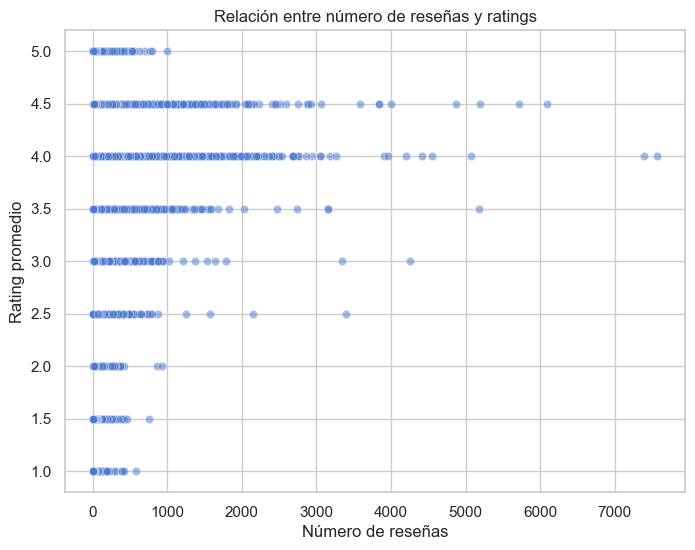

In [31]:
# Scatterplot entre número de reseñas y rating promedio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_business, x="review_count", y="stars", alpha=0.5)
plt.title("Relación entre número de reseñas y ratings")
plt.xlabel("Número de reseñas")
plt.ylabel("Rating promedio")
plt.show()

Insight: Esto puede mostrar si los negocios con más reseñas tienden a tener ratings más altos o más bajos.

Interpretación:
- Los negocios con mayor número de reseñas suelen tner ratings promedio entre 4.0 y 5.0, lo que indica que los negocios más populares tienden a revibir buenas calificaciones.
- Existe una alta densidad de puntos en el rango de 4.0 a 5.0 estrellas, lo que indica que la mayoría de los negocios tienen buenas calificaciones. Sin embargo, no todos tienen una gran cantidad de reseñas.
- No se observa una fuerte correlación lineal entre el número de reseñas y el rating promedio, pero sí una tendencia donde las reseñas positivas predominan en negocios más populares.

Análisis Geográfico

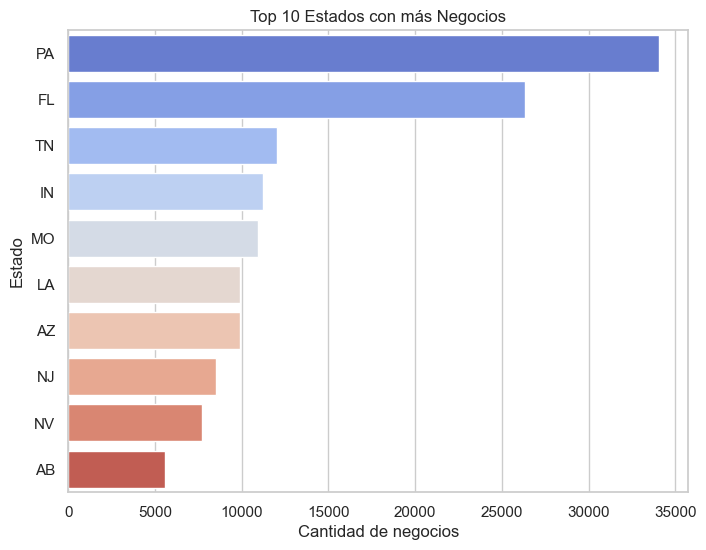

In [32]:
# Distribución de negocios por estado
state_counts = df_business["state"].value_counts().head(10)

# Visualizar distribución por estado
plt.figure(figsize=(8, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="coolwarm")
plt.title("Top 10 Estados con más Negocios")
plt.xlabel("Cantidad de negocios")
plt.ylabel("Estado")
plt.show()

Interpretación:

- Pennsylvania (PA): Lidera el ranking, con una cantidad significativamente mayor de negocios en comparación con los demás estados.
- Florida (FL): Ocupa el segundo lugar, destacando también por su gran cantidad de negocios.
- Tennessee (TN), Indiana (IN), Missouri (MO), Louisiana (LA), Arizona (AZ), Nueva Jersey (NJ), Nevada (NV) y Alabama (AB): Completan los 10 primeros lugares, aunque con una menor cantidad de negocios en comparación con los dos primeros.

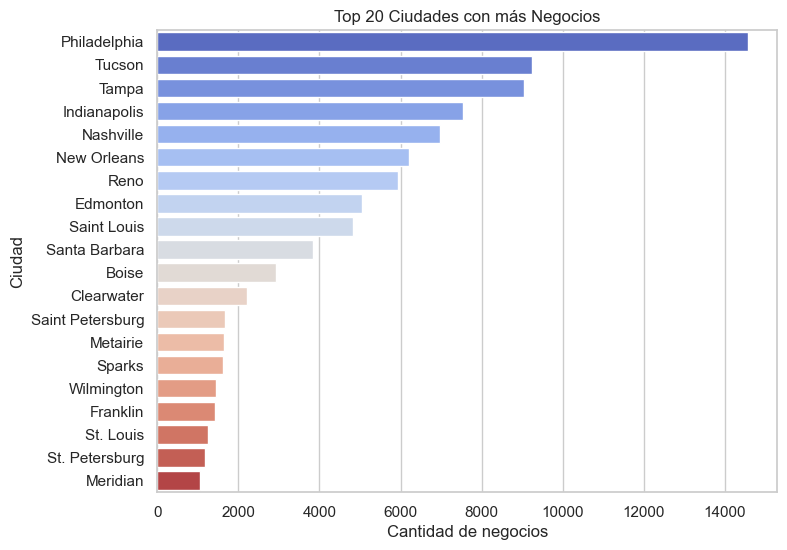

In [33]:
# Distribución de negocios por ciudad
state_counts = df_business["city"].value_counts().head(20)

# Visualizar distribución por estado
plt.figure(figsize=(8, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="coolwarm")
plt.title("Top 20 Ciudades con más Negocios")
plt.xlabel("Cantidad de negocios")
plt.ylabel("Ciudad")
plt.show()

Interpretación:
- La ciudad de Philadelphia, lidera el rantking de ciudades con mayor cantidad de negocios, seguido de Tucson y Tampa

Análisis de Horarios

In [34]:
# Contar cuántos negocios tienen horarios definidos
has_hours = df_business["hours"].notnull().sum()
total_businesses = len(df_business)

print(f"{has_hours}/{total_businesses} negocios tienen horarios definidos ({(has_hours / total_businesses) * 100:.2f}%)")


127123/150346 negocios tienen horarios definidos (84.55%)


Análisis de las 30 Categorías con Reseñas Positivas (4-5 Estrellas)

In [35]:

# Filtrar las reseñas positivas (4 a 5 estrellas)
positive_reviews = df_business[df_business["stars"].between(4, 5)]

# Expandir las categorías (lista) en filas individuales
# Primero asegurarse de que las categorías sean listas
positive_reviews["categories"] = positive_reviews["categories"].apply(lambda x: x if isinstance(x, list) else [])
expanded_categories = positive_reviews.explode("categories")

# Contar la cantidad de reseñas por categoría
category_counts = expanded_categories["categories"].value_counts()

# Crear un DataFrame con el top 20 de categorías
top_30_categories = category_counts.head(30).reset_index()
top_30_categories.columns = ["category", "review_count"]

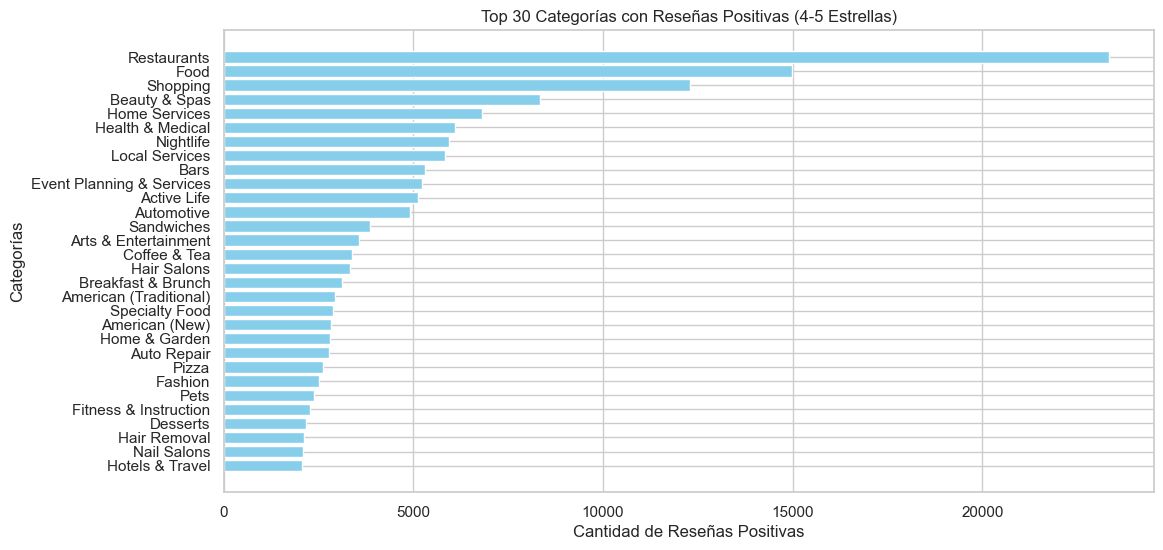

In [36]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_30_categories["category"], top_30_categories["review_count"], color='skyblue')
plt.xlabel("Cantidad de Reseñas Positivas")
plt.ylabel("Categorías")
plt.title("Top 30 Categorías con Reseñas Positivas (4-5 Estrellas)")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el top primero
plt.show()

Interpretación:

- La categoria de alimentación predomida, ya que categorias como Restaurants y Food lideran el ranking de negocios con mayor cantidad de reseñas positivas, además de estar valorados en el ranting de estrellas de 4 a 5.
- Le siguen categorias como Beauty & Spas. 


### Recomendaciones

Guardar archivos